# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [23]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [24]:
browser = Browser('chrome')

In [25]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [26]:
# Create a Beautiful Soup Object
html  = browser.html
html_parser = BeautifulSoup(html,'html.parser')



In [27]:
# Extract all rows of data
table = html_parser.find('table', class_='table')
table_rows = table.find_all('tr')

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [28]:
# Create an empty list
data_list = []

# Loop through the scraped data to create a list of rows
for table_row in table_rows[1:]:
    columns = table_row.find_all('td')
    columns = [col.text.strip('[]') for col in columns]
    data_list.append(columns)

In [29]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
column_names = ['id',	'terrestrial_date',	'sol',	'ls',	'month',	'min_temp',	'pressure']
columns_df = pd.DataFrame(data_list, columns=column_names)

In [30]:
# Confirm DataFrame was created successfully
print(columns_df.head())



   id terrestrial_date sol   ls month min_temp pressure
0   2       2012-08-16  10  155     6    -75.0    739.0
1  13       2012-08-17  11  156     6    -76.0    740.0
2  24       2012-08-18  12  156     6    -76.0    741.0
3  35       2012-08-19  13  157     6    -74.0    732.0
4  46       2012-08-20  14  157     6    -74.0    740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [31]:
# Examine data type of each column
print(columns_df.dtypes)

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object


In [32]:
# Change data types for data analysis
columns_df['id'] = columns_df['id'].astype(int)
columns_df['terrestrial_date'] = pd.to_datetime(columns_df['terrestrial_date'])
columns_df['sol'] = columns_df['sol'].astype(int)
columns_df['ls'] = columns_df['ls'].astype(int)
columns_df['month'] = columns_df['month'].astype(int)
columns_df['min_temp'] = columns_df['min_temp'].astype(float)
columns_df['pressure'] = columns_df['pressure'].astype(float)

In [33]:
# Confirm type changes were successful by examining data types again
print(columns_df.dtypes)

id                           int32
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                        int32
min_temp                   float64
pressure                   float64
dtype: object


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [34]:
# 1. How many months are there on Mars?
mars_months = columns_df['month'].nunique()
print("Months on Mars: ", mars_months)

Months on Mars:  12


In [35]:
# 2. How many sols (Martian days) worth of data are there?
sols_mars = columns_df['sol'].nunique()
print("Martian days worth of data: ", sols_mars)

Martian days worth of data:  1867


In [36]:
# 3. What is the average minimum temperature by month?
avg_min_temp = columns_df.groupby('month')['min_temp'].mean()
print(avg_min_temp)

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64


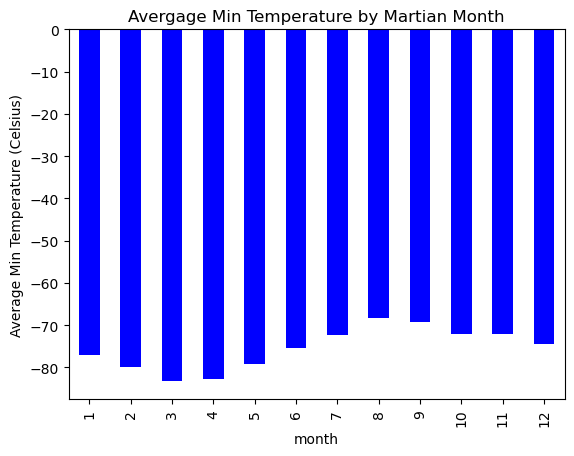

In [37]:
# Plot the average minimum temperature by month
avg_min_temp.plot(kind='bar', color='blue')
plt.ylabel("Average Min Temperature (Celsius)")
plt.title("Avergage Min Temperature by Martian Month")
plt.show()

In [38]:
# Identify the coldest and hottest months in Curiosity's location by sorting the previous graph
coldest_month = avg_min_temp.idxmin()
hottest_month = avg_min_temp.idxmax()
print("The coldest month on Mars is: ", coldest_month)
print("The hottest month on Mars is: ", hottest_month)

The coldest month on Mars is:  3
The hottest month on Mars is:  8


In [39]:
# 4. What is the average pressure by month?
avg_pressure_month = columns_df.groupby("month")['pressure'].mean()
print(avg_pressure_month)

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64


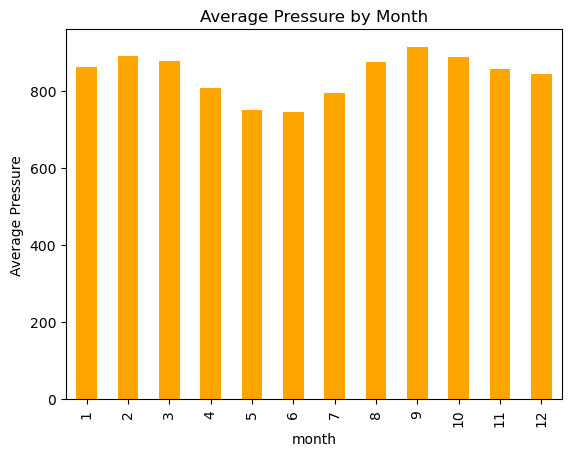

In [40]:
# Plot the average pressure by month
avg_pressure_month.plot(kind='bar', color="orange") 
plt.ylabel("Average Pressure")
plt.title("Average Pressure by Month")
plt.show()

In [41]:
# Identify the lowest and highest pressure months in Curiosity's location by sorting the previous graph
lowest_pressure_month = avg_pressure_month.idxmin()
highest_pressure_month = avg_pressure_month.idxmax()
print("The month with the lowest pressure on Mars is: ", lowest_pressure_month)
print("The month with the highest pressure on Mars is: ", highest_pressure_month)

The month with the lowest pressure on Mars is:  6
The month with the highest pressure on Mars is:  9


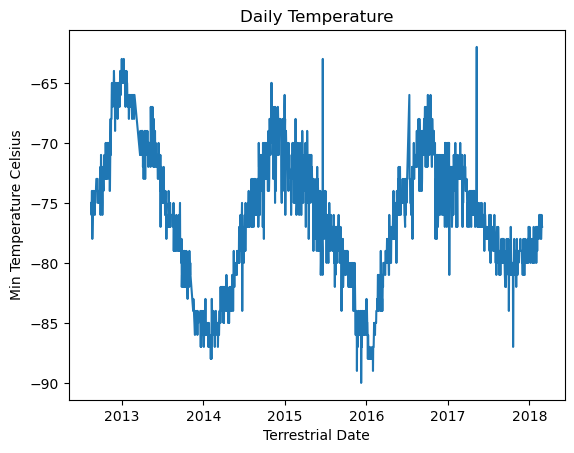

In [42]:
# 5. How many terrestrial (Earth) days are there in a Martian year?
# Visually estimate the result by plotting the daily minimum temperature of each observation in the data set.
plt.plot(columns_df['terrestrial_date'], columns_df['min_temp'], label="Min Temperature")
plt.ylabel('Min Temperature Celsius')
plt.xlabel('Terrestrial Date')
plt.title('Daily Temperature')
plt.show()

#### Minimum Temperature

YOUR ANALYSIS HERE

#### Atmospheric Pressure

YOUR ANALYSIS HERE

#### Year Length

YOUR ANALYSIS HERE

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [43]:
# Write the data to a CSV
columns_df.to_csv('weather_data.csv', index=False)

In [44]:
browser.quit()